
#2°_projeto_machine_learning!


Métodos de estudos cíclicos:

#Tópicos utilizados:


Python -> Machine learning -> Métricas de performance -> Estatística.

In [ ]:
from google.colab import files
from IPython.display import Image

In [ ]:
upload = files.upload()

Saving car_prices_image.jpg to car_prices_image.jpg


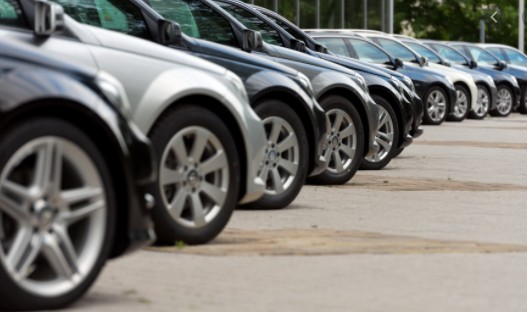

In [ ]:
Image('car_prices_image.jpg', width = 2300)

#Imports:



In [ ]:
import pandas as pd
import  numpy as np

from sklearn import linear_model as lm




#Loading data:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_raw = pd.read_csv ('/content/drive/My Drive/cars_prices.csv')


In [ ]:
df_raw.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df_raw.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3062,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
# NaN counting:

df_raw.isnull().sum()


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
# Columns drops

df_raw.drop(df_raw.columns[[1, 2, 3, 4, 5, 6, 7, 8, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]], axis=1, inplace=True)


# Data preparation:






In [ ]:
#features:

x_train = df_raw.drop ( ['car_ID', 'price'], axis=1 )

#response variable:

y_train = df_raw ['price'].copy()

In [ ]:
x_train.head()

,wheelbase,carlength,carwidth,carheight
0,88.6,168.8,64.1,48.8
1,88.6,168.8,64.1,48.8
2,94.5,171.2,65.5,52.4
3,99.8,176.6,66.2,54.3
4,99.4,176.6,66.4,54.3


In [ ]:
y_train.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

# Model Training:

In [ ]:
# model description:

model_lr = lm.LinearRegression()

# model training:

model_lr.fit( x_train, y_train )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# prediction:

pred = model_lr.predict( x_train )

# Performance Metrics:


In [ ]:
df1 = df_raw.copy()

In [ ]:
df1['prediction'] = pred

In [ ]:
# id car, price and prediction done by linear regression:

df1[['car_ID', 'price', 'prediction']].head()

,car_ID,price,prediction
0,1,13495.0,12236.710154
1,2,16500.0,12236.710154
2,3,16500.0,13074.687602
3,4,13950.0,14070.314340
4,5,17450.0,14574.637300


In [ ]:
# error calculation using real car prices and prediction:
df1['error'] = df1['price'] - df1['prediction']

In [ ]:
df1[['car_ID', 'price', 'prediction', 'error', 'error_abs']].head()

,car_ID,price,prediction,error,error_abs
0,1,13495.0,12236.710154,1258.289846,1258.289846
1,2,16500.0,12236.710154,4263.289846,4263.289846
2,3,16500.0,13074.687602,3425.312398,3425.312398
3,4,13950.0,14070.314340,-120.314340,120.314340
4,5,17450.0,14574.637300,2875.362700,2875.362700


In [ ]:
# error presentation using numpy (absolute):
df1['error_abs'] = np.abs( df1['error'] )

In [ ]:
# All errors sum: 
np.sum( df1['error_abs'] )

697761.6173386404

In [ ]:
# The error sum divided  to all elements: 
np.sum( df1['error_abs'] ) / len (df1['error_abs'] )

3403.715206529953

In [ ]:
# mean of absolute error calculation:
np.mean ( df1['error_abs'] )

3403.7152065299515

In [ ]:
# Percentage of errors related to real prices:
df1['error_%'] = ((df1['price'] - df1['prediction'] )/ df1['price'] )

In [ ]:
# error percentage presentation using numpy (absolute):
df1['error_%_abs'] = np.abs( df1['error_%'] )

In [ ]:
df1[['car_ID', 'price', 'prediction', 'error', 'error_abs', 'error_%', 'error_%_abs' ]].head()

,car_ID,price,prediction,error,error_abs,error_%,error_%_abs
0,1,13495.0,12236.710154,1258.289846,1258.289846,0.093241,0.093241
1,2,16500.0,12236.710154,4263.289846,4263.289846,0.258381,0.258381
2,3,16500.0,13074.687602,3425.312398,3425.312398,0.207595,0.207595
3,4,13950.0,14070.314340,-120.314340,120.314340,-0.008625,0.008625
4,5,17450.0,14574.637300,2875.362700,2875.362700,0.164777,0.164777


In [ ]:
# mean absolune error:

mae = np.mean( df1['error_abs'] )

print ('MAE: {}'.format (mae))

MAE: 3403.7152065299515


In [ ]:
# mean absolute percentage error:

mape = np.mean( df1['error_%_abs'] )

print ('MAPE: {}'.format (mape) )

MAPE: 0.26494094100300364
